In [262]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [263]:
# Load Data
iris = datasets.load_iris()
x = iris.data
y = iris.target

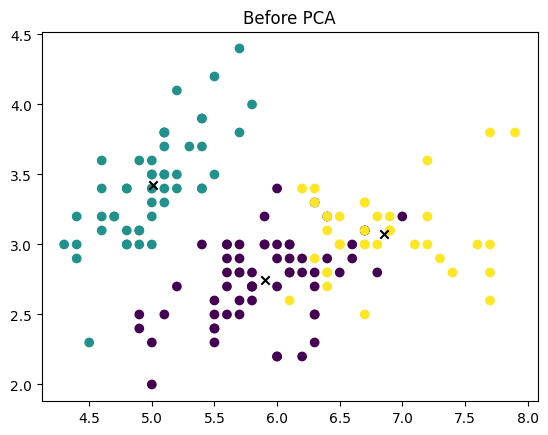

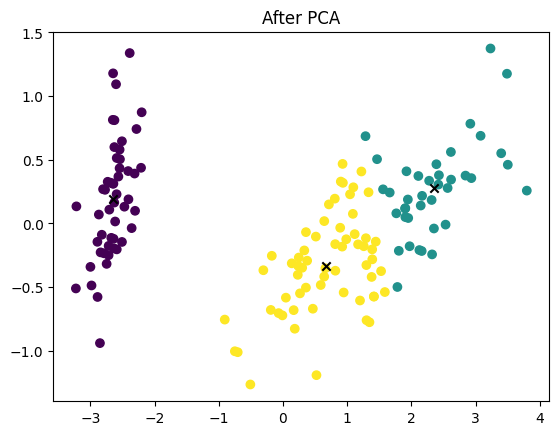

In [264]:
def generate_plot(all_predictions, centroids, title="Before PCA"): 
    # plot the data points colored by their cluster assignments
    plt.scatter(x[:,0], x[:,1], c=all_predictions) 
    # plot the cluster centroids
    plt.scatter(centroids[:,0], centroids[:,1], marker='x', color="black")
    plt.title(title)
    return plt.show()   

def kmeans_clustering(x):
    # create a KMeans model with 3 clusters and fit it to the data
    model = KMeans(n_clusters=3, n_init=1, max_iter=100)
    model.fit(x)
    all_predictions = model.predict(x)
    centroids = model.cluster_centers_
    return all_predictions, centroids


def kmeans_clustering_after_pca(x):
    # apply PCA to reduce the data to 2 dimensions
    pca = PCA(n_components=2)
    x_reduced = pca.fit_transform(x)
    # run k-means clustering on the reduced data
    all_predictions, centroids = kmeans_clustering(x_reduced)
    return all_predictions, centroids, x_reduced

# plot the data before applying PCA
all_predictions, centroids =  kmeans_clustering(x)
generate_plot(all_predictions, centroids)

# plot the data after applying PCA
all_predictions, centroids, x = kmeans_clustering_after_pca(x)
generate_plot(all_predictions, centroids, title="After PCA")
